In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in training data
original_train = pd.read_csv('train.csv')
#view the first 10 rows of the data
original_train.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [2]:
#load in testing data
original_test = pd.read_csv('test.csv')
original_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


# Exploratory Data Analysis

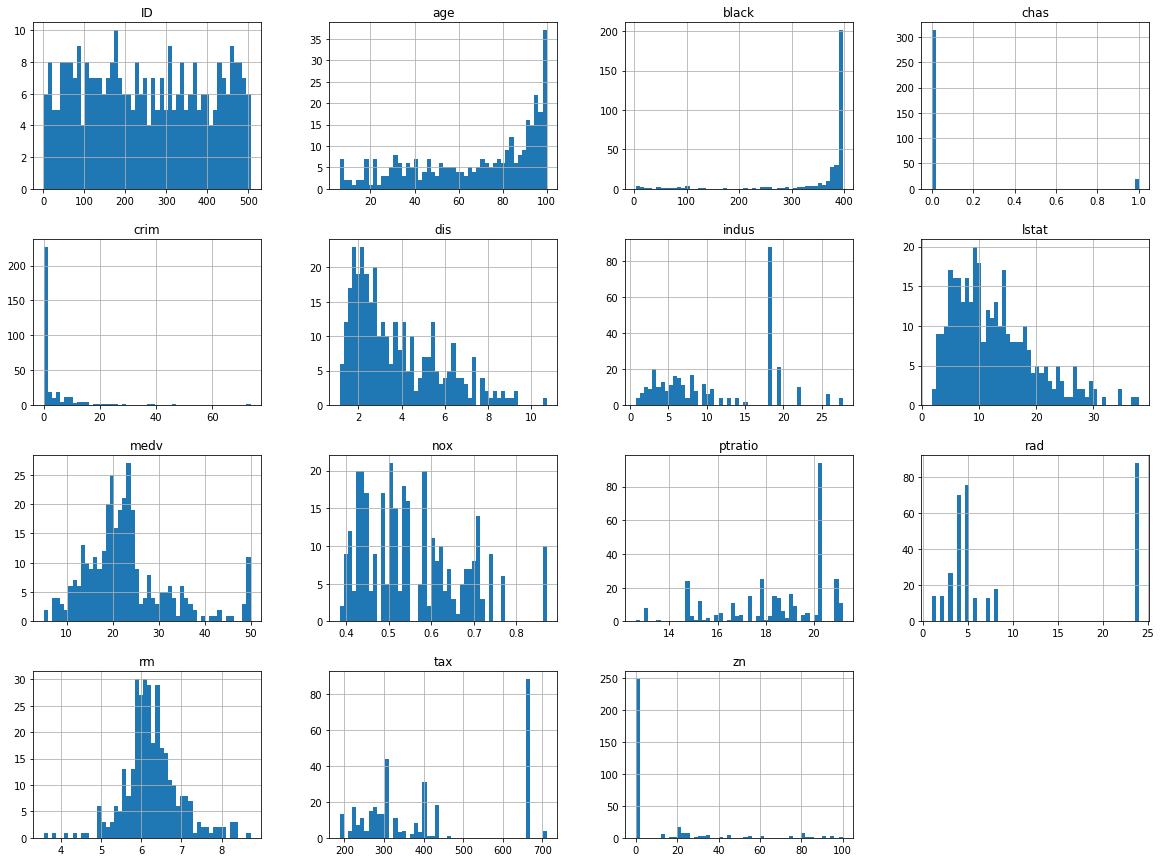

In [3]:
original_train.hist(bins = 50, figsize = (20,15))
plt.show()

In [4]:
#check if there are any overlapping IDs
len(set(original_train['ID']))

333

In [5]:
#check if there are any null values in dataframe
original_train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
#describing the data
original_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [20]:
X_train = original_train.drop(['ID','medv'],axis = 1)
Y_train = original_train['medv']

In [7]:
#crim, zn, indus, age, dis, lstat, black have outliers

# Random Forest Regression
Don't need to scale features since numerical and precision issues are not that important

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#get the possible random forest parameters
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Default Random Forest

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, Y_train,scoring = 'neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[3.04249848 3.82924937 3.85838958 7.32289653 5.00722418]
4.612051628302149
1.49325981500761


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [65]:
rf_orig = rf.fit(X_train,Y_train)
rf_orig_predict = rf_orig.predict(original_test.drop(['ID'], axis = 1))
rf_orig_predicts = np.reshape(rf_orig_predict, (-1, 1))
rf_orig_predicts.shape

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(173, 1)

In [67]:
#create a Dataframe from a np.ndarray
rf_orig_rand_pred_df = pd.DataFrame({'medv': rf_orig_predicts[:,0]})
#join to make a final for submission
rf_orig_rand_final = pd.concat([original_test['ID'], rf_orig_rand_pred_df], axis=1)
rf_orig_rand_final.head()

,ID,medv
0,3,31.03
1,6,24.94
2,8,16.62
3,9,14.32
4,10,17.83


In [68]:
rf_orig_rand_final.to_csv('RFOrig.csv', index = False)
#Score was 4.07978 (49 out of 75)

# Random Forest with Randomized Search

In [18]:
#performing a Randomized Sarch
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [54]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, scoring = 'neg_mean_squared_error', random_state=0)

In [55]:
#measure the amount of CPU and wall time to complete fit the random search model
%%time

# Fit the random search model
rf_random.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 8min 37s, sys: 541 ms, total: 8min 37s
Wall time: 8min 38s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [56]:
rf_random.best_params_

{'n_estimators': 231,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [69]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=231, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
#equivalent root mean squared error for best GridSearch score
print(rf_random.best_score_)

-22.204555274283663


In [59]:
#equivalent root mean squared error for best GridSearch score
print(np.sqrt(-rf_random.best_score_))

4.712170972522502


In [63]:
feature_rand_importances = rf_random.best_estimator_.feature_importances_
print(sorted(zip(feature_rand_importances,X_train),reverse=True))

[(0.49385983351247, 'rm'), (0.33992972570068686, 'lstat'), (0.06462525720665761, 'dis'), (0.03508096683403514, 'crim'), (0.01422892571065301, 'age'), (0.01194453456363734, 'nox'), (0.010511465293519134, 'tax'), (0.009931492674875479, 'ptratio'), (0.008868366526495546, 'black'), (0.0053467705898548505, 'rad'), (0.0040096251092195225, 'indus'), (0.0008474932567757488, 'zn'), (0.0008155430211195668, 'chas')]


In [60]:
rf_rand_pred = rf_random.predict(original_test.drop(['ID'], axis = 1))
rf_rand_predict = np.reshape(rf_rand_pred, (-1, 1))
rf_rand_predict.shape

(173, 1)

In [61]:
#create a Dataframe from a np.ndarray
rf_rand_pred_df = pd.DataFrame({'medv': rf_rand_predict[:,0]})
#join to make a final for submission
rf_rand_final = pd.concat([original_test['ID'], rf_rand_pred_df], axis=1)
rf_rand_final.head()

,ID,medv
0,3,34.463516
1,6,25.495265
2,8,16.509170
3,9,15.114986
4,10,17.750733


In [62]:
rf_rand_final.to_csv('RFRandSearch.csv', index = False)
#Score was 3.76604 (29 out of 75)

# Random Forest Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [100, 200, 231, 300, 400, 600]
# Maximum number of levels in tree
max_depth = [10,20,35,50,75,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,5,6,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3,4]
# Create the random grid
grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators': n_estimators}

In [71]:
rf_gridsearch = GridSearchCV(estimator = rf, param_grid = grid, 
                               cv = 5, scoring = 'neg_mean_squared_error')

In [72]:
%%time
# Fit the grid search model
rf_gridsearch.fit(X_train, Y_train)

CPU times: user 27min 46s, sys: 4.86 s, total: 27min 51s
Wall time: 27min 56s


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 35, 50, 75, 100, None], 'min_samples_split': [2, 4, 5, 6, 8], 'min_samples_leaf': [1, 2, 3, 4], 'n_estimators': [100, 200, 231, 300, 400, 600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [73]:
#best parameters to use based on GridSearch
rf_gridsearch.best_params_

{'max_depth': 35,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [74]:
#best score found using GridSearch for negative mean squared error
rf_gridsearch.best_score_

-21.55959635070956

In [75]:
#equivalent root mean squared error for best GridSearch score
print(np.sqrt(-rf_gridsearch.best_score_))

4.643231240279722


In [76]:
feature_importances = rf_gridsearch.best_estimator_.feature_importances_
print(sorted(zip(feature_importances,X_train),reverse=True))

[(0.48469933227929685, 'rm'), (0.35807171759808426, 'lstat'), (0.062243626387044865, 'dis'), (0.0351729588744849, 'crim'), (0.012222142985035761, 'age'), (0.010535455228805488, 'nox'), (0.010008458352572462, 'tax'), (0.008371591492972112, 'ptratio'), (0.007772638459995989, 'black'), (0.006129055268452951, 'rad'), (0.0035318868740290736, 'indus'), (0.0007288600301626079, 'zn'), (0.0005122761690628444, 'chas')]


In [77]:
rf_predict = rf_gridsearch.predict(original_test.drop(['ID'], axis = 1))
rf_predicts = np.reshape(rf_predict, (-1, 1))
rf_predicts.shape

(173, 1)

In [78]:
#create a Dataframe from a np.ndarray
rf_pred = pd.DataFrame({'medv': rf_predicts[:,0]})
#join to make a final for submission
rf_final = pd.concat([original_test['ID'], rf_pred], axis=1)
rf_final.head()

,ID,medv
0,3,34.447522
1,6,25.509574
2,8,16.085089
3,9,14.747569
4,10,17.742274


In [79]:
rf_final.to_csv('RFGridSearch.csv', index = False)
#Score was 3.85356 (35 out of 75)

# Feature Reduction Model

In [81]:
X_fewtrain = original_train.drop(['ID','medv','chas','zn'], axis = 1)
Y_train = original_train['medv']

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, scoring = 'neg_mean_squared_error', random_state=0)

In [87]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
rf_random.fit(X_fewtrain, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 8min 43s, sys: 1.08 s, total: 8min 44s
Wall time: 8min 45s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [88]:
rf_random.best_params_

{'n_estimators': 231,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [89]:
X_fewtrain.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [97]:
X_fewertrain = X_fewtrain.drop(['indus','rad','black','ptratio'], axis = 1)
X_fewertrain.head()

,crim,nox,rm,age,dis,tax,lstat
0,0.00632,0.538,6.575,65.2,4.0900,296,4.98
1,0.02731,0.469,6.421,78.9,4.9671,242,9.14
2,0.03237,0.458,6.998,45.8,6.0622,222,2.94
3,0.06905,0.458,7.147,54.2,6.0622,222,5.33
4,0.08829,0.524,6.012,66.6,5.5605,311,12.43


In [91]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [92]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, scoring = 'neg_mean_squared_error', random_state=0)

In [93]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
rf_random.fit(X_fewertrain, Y_train)

CPU times: user 4min, sys: 419 ms, total: 4min 1s
Wall time: 4min 1s


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 8, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [94]:
rf_random.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [95]:
#equivalent root mean squared error for best GridSearch score
print(np.sqrt(-rf_random.best_score_))

4.631930736414811


In [98]:
feature_importances = rf_random.best_estimator_.feature_importances_
print(sorted(zip(feature_importances,X_fewertrain),reverse=True))

[(0.49797196880104977, 'rm'), (0.3439086449025626, 'lstat'), (0.07521190740839095, 'dis'), (0.03600752365314362, 'crim'), (0.01680173005319865, 'age'), (0.01609985246704112, 'nox'), (0.013998372714613006, 'tax')]


In [118]:
rf_few_predict = rf_random.predict(original_test.drop(['ID','chas','zn','indus','black','rad','ptratio'], axis = 1))
rf_few_predicts = np.reshape(rf_few_predict, (-1, 1))
rf_few_predicts.shape

(173, 1)

In [119]:
#create a Dataframe from a np.ndarray
rf_few_pred = pd.DataFrame({'medv': rf_few_predicts[:,0]})
#join to make a final for submission
rf_few_final = pd.concat([ID_column, rf_few_pred], axis=1)
rf_few_final.head()
rf_few_final.shape

(173, 2)

In [120]:
rf_few_final.to_csv('RFRandFewSearch.csv', index = False)
#Score was 3.95067 (42 out of 75)